In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
from scipy.stats import chi2

%matplotlib inline

In [2]:
actual_data = pd.read_csv("../../datasets/stock_prices/index_2018.csv")
df = actual_data.copy()
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df_index = df["date"]
df.drop("date", axis=1, inplace=True)
df.index = df_index
df.index.name = None

df = df.asfreq("b")

df = df.apply(lambda x: x.fillna(method="ffill"))

df_spx = pd.DataFrame(df["spx"])
df_ftse = pd.DataFrame(df["ftse"])

df_ftse["returns"] = df_ftse["ftse"].pct_change(1)

In [4]:
start_date = "1994-01-10"
end_date = "2025-01-29"

In [5]:
size = int(len(df_ftse) * 0.8)
df_train = df_ftse.iloc[:size]
df_test = df_ftse.iloc[size:]

## AR

In [6]:
model = ARMA(df_train["ftse"], order=(6, 0))
result = model.fit()

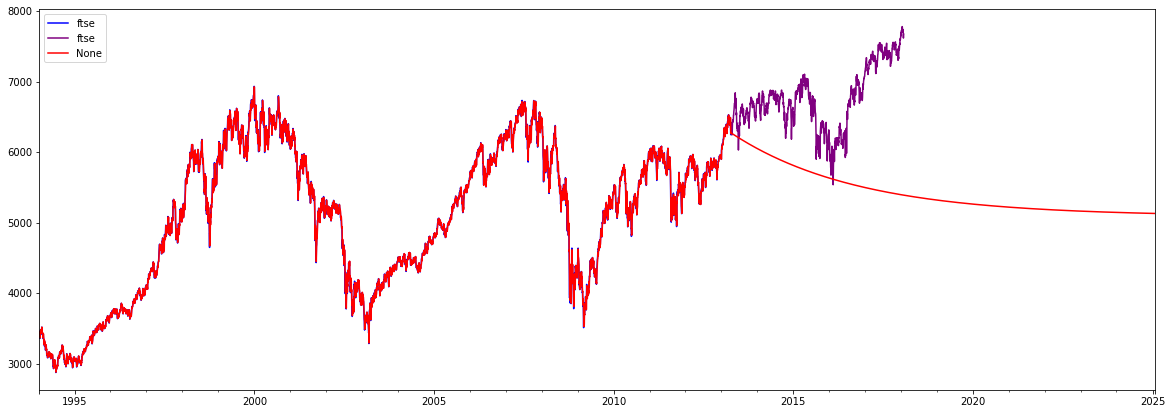

In [7]:
plt.figure(figsize=(20, 7))
df_train["ftse"].plot(color="blue")
df_test["ftse"].plot(color="purple")
predictions = result.predict(start=start_date, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

***While forecasting test values, AR model performs poorly as it doesn't know previous values. It was only trained on test dataset.***

In [8]:
model = ARMA(df_train["returns"][1:], order=(6, 0))
result = model.fit()

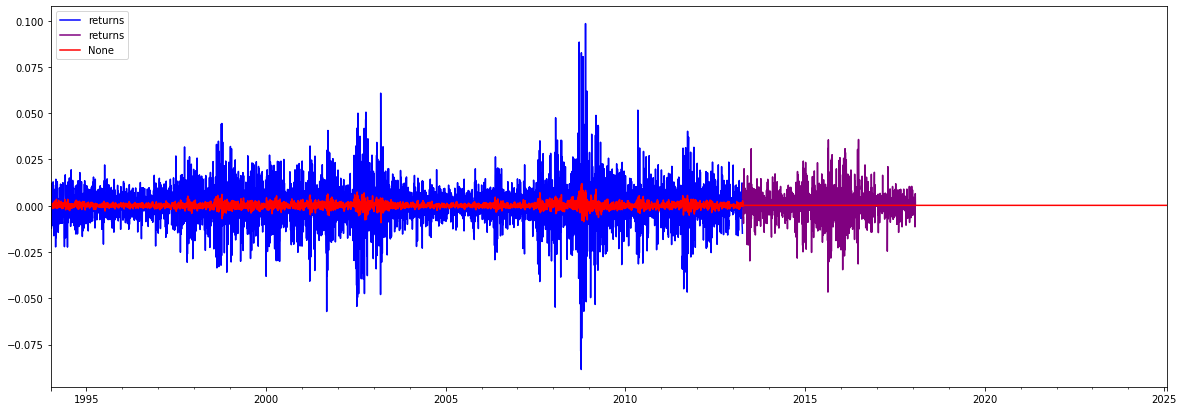

In [9]:
plt.figure(figsize=(20, 7))
df_train["returns"][1:].plot(color="blue")
df_test["returns"].plot(color="purple")
predictions = result.predict(start=start_date, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

***In case of returns, again it performs poorly on test set, as it predicts almost always zero.***

## MA

In [10]:
model = ARMA(df_train["ftse"], order=(0, 6))
result = model.fit()

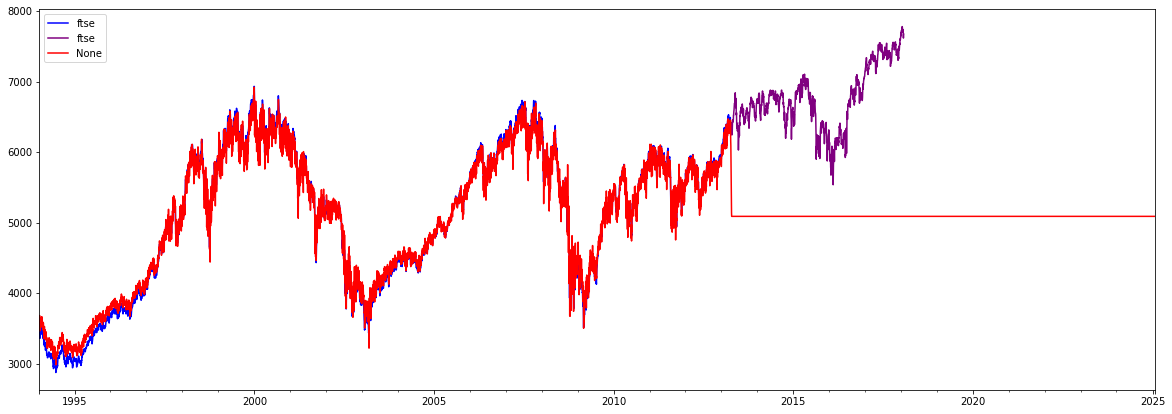

In [11]:
plt.figure(figsize=(20, 7))
df_train["ftse"].plot(color="blue")
df_test["ftse"].plot(color="purple")
predictions = result.predict(start=start_date, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

In [12]:
model = ARMA(df_train["returns"][1:], order=(0, 6))
result = model.fit()

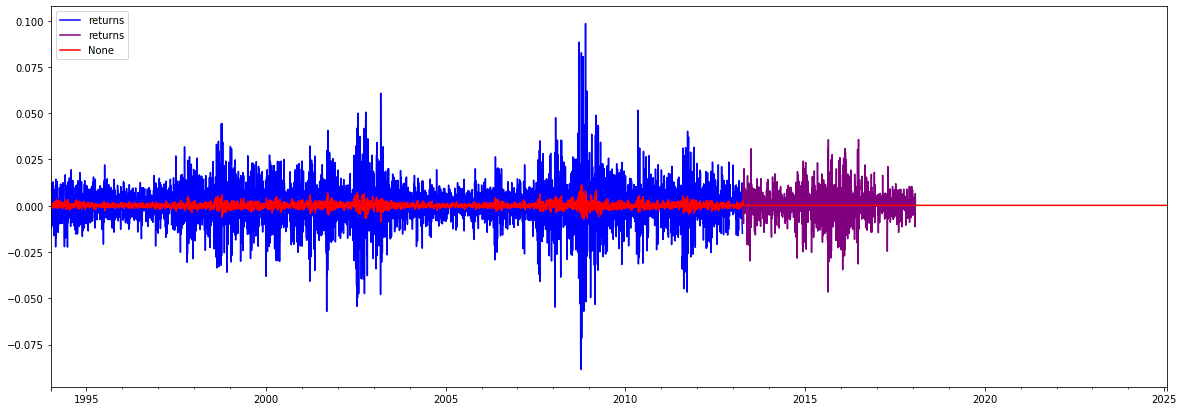

In [13]:
plt.figure(figsize=(20, 7))
df_train["returns"][1:].plot(color="blue")
df_test["returns"].plot(color="purple")
predictions = result.predict(start=start_date, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

## ARMA

In [14]:
model = ARMA(df_train["ftse"], order=(5, 4))
result = model.fit()

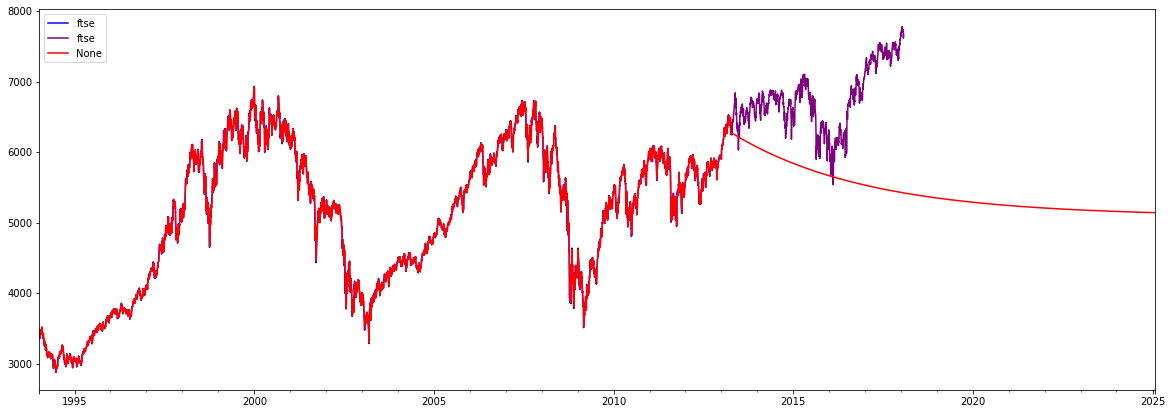

In [15]:
plt.figure(figsize=(20, 7))
df_train["ftse"].plot(color="blue")
df_test["ftse"].plot(color="purple")
predictions = result.predict(start=start_date, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

In [16]:
model = ARMA(df_train["returns"][1:], order=(5, 4))
result = model.fit()

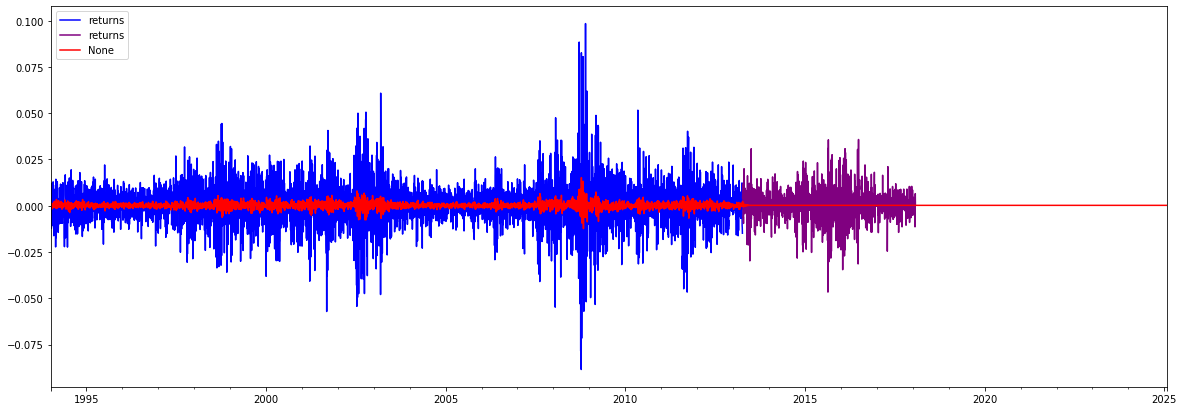

In [18]:
plt.figure(figsize=(20, 7))
df_train["returns"][1:].plot(color="blue")
df_test["returns"].plot(color="purple")
predictions = result.predict(start=start_date, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

## ARIMA

In [117]:
model = ARIMA(df_train["ftse"], order=(4, 1, 2))
result = model.fit()

In [125]:
first_difference_prices_train = df_train["ftse"] - df_train["ftse"].shift(1)
first_difference_prices_test = df_test["ftse"] - df_test["ftse"].shift(1)

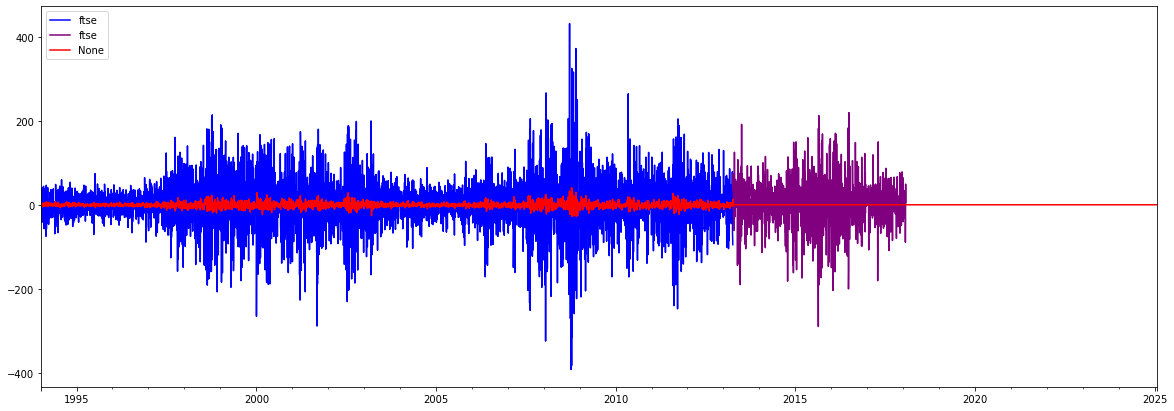

In [122]:
plt.figure(figsize=(20, 7))
first_difference_prices_train[1:].plot(color="blue")
first_difference_prices_test[1:].plot(color="purple")
predictions = result.predict(start=start_date, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

In [127]:
first_difference_returns_train = df_train["returns"][1:] - df_train["returns"][1:].shift(1)
first_difference_returns_test = df_test["returns"][1:] - df_test["returns"][1:].shift(1)

In [128]:
model = ARIMA(df_train["returns"][1:], order=(4, 1, 2))
result = model.fit()

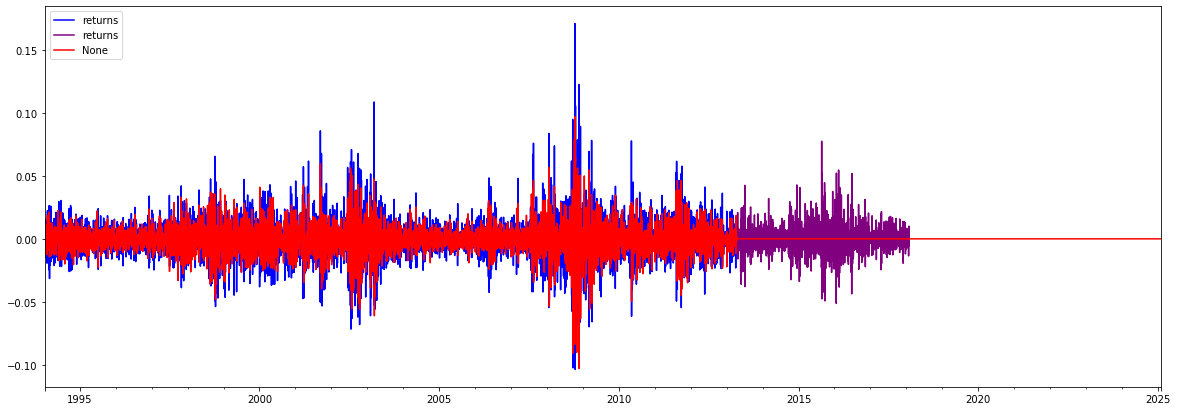

In [129]:
plt.figure(figsize=(20, 7))
first_difference_returns_train[1:].plot(color="blue")
first_difference_returns_test[1:].plot(color="purple")
predictions = result.predict(start=1, end=end_date)
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

## ARIMAX

In [130]:
model = ARIMA(df["ftse"], exog=df[["spx", "dax"]], order=(1, 1, 1))
result = model.fit()

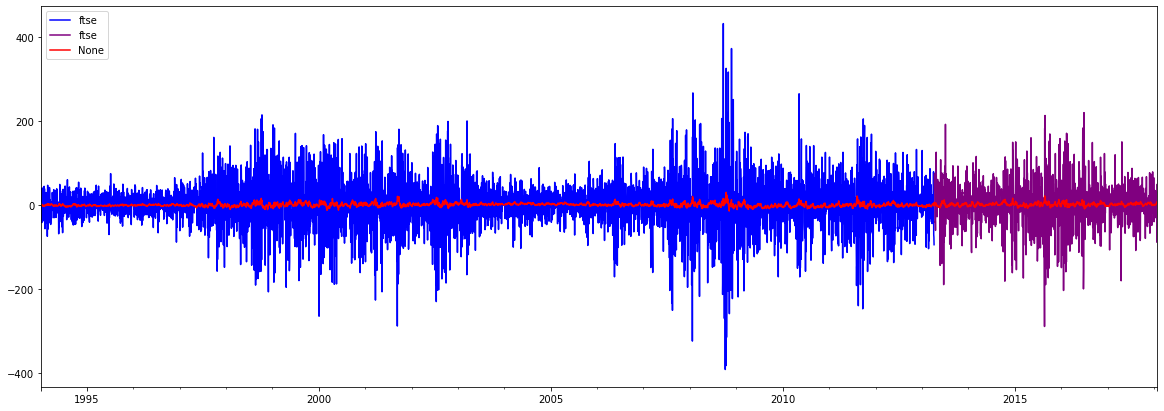

In [131]:
plt.figure(figsize=(20, 7))
first_difference_prices_train[1:].plot(color="blue")
first_difference_prices_test[1:].plot(color="purple")
predictions = result.predict(start=start_date, end="2018-01-29", exog=df[["spx", "dax"]])
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

In [132]:
model = ARIMA(df_ftse["returns"][1:], order=(1, 1, 1), exog=df[["spx", "dax"]][1:])
result = model.fit()

C:\Users\Hritik\AppData\Local\Continuum\anaconda3\envs\my_env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


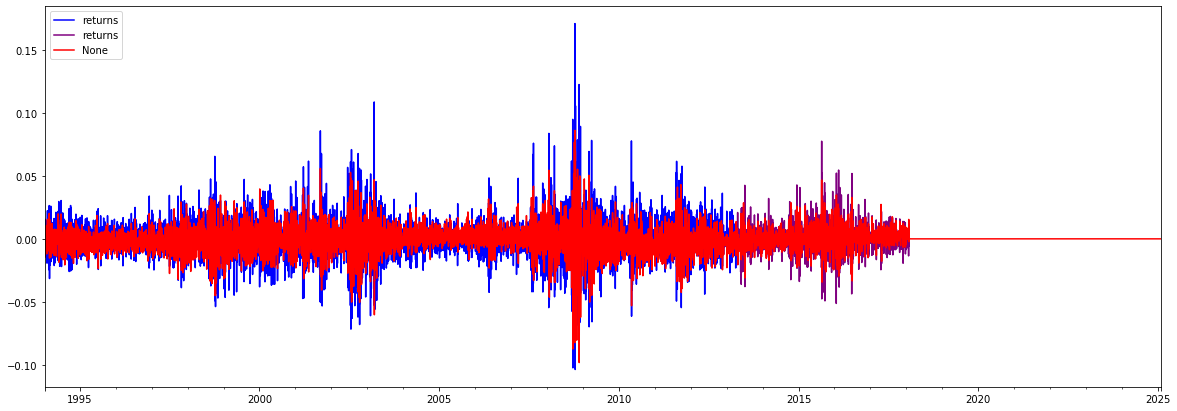

In [133]:
plt.figure(figsize=(20, 7))
first_difference_returns_train[1:].plot(color="blue")
first_difference_returns_test[1:].plot(color="purple")
predictions = result.predict(start=1, end=end_date, exog=df[["spx", "dax"]][1:])
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

## SARIMAX

In [114]:
model = SARIMAX(df_ftse["ftse"], exog=df[["spx", "dax"]], order=(1, 0, 1), seasonal_order=(2, 0, 1, 5), enforce_stationarity=False)
result = model.fit()

C:\Users\Hritik\AppData\Local\Continuum\anaconda3\envs\my_env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


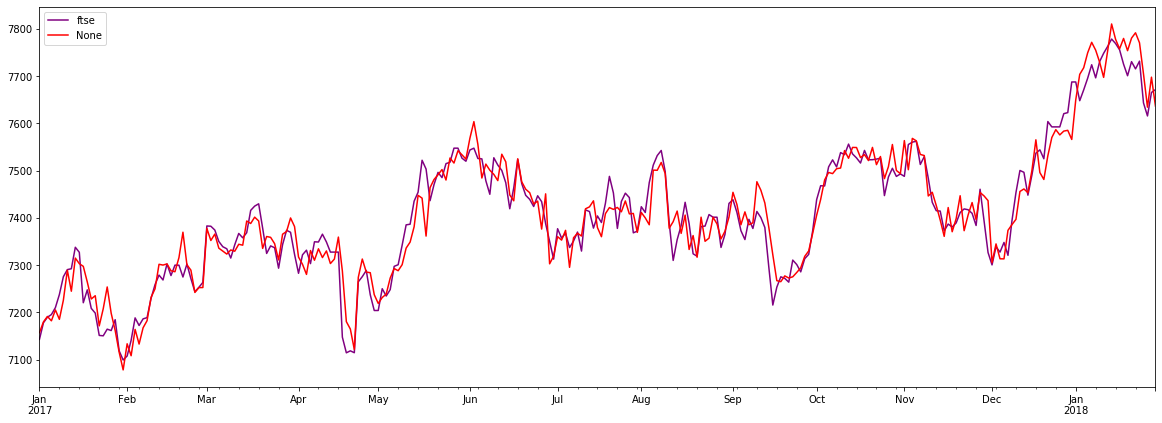

In [116]:
plt.figure(figsize=(20, 7))
df_test["ftse"].loc["2017-01-02":].plot(color="purple")
predictions = result.predict(start="2017-01-02", end="2018-01-29", exog=df[["spx", "dax"]][1:])
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

In [104]:
model = SARIMAX(df_ftse["returns"][1:], exog=df[["spx", "dax"]][1:], order=(1, 0, 1), seasonal_order=(2, 0, 1, 5), enforce_stationarity=False)
result = model.fit()

C:\Users\Hritik\AppData\Local\Continuum\anaconda3\envs\my_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hritik\AppData\Local\Continuum\anaconda3\envs\my_env\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


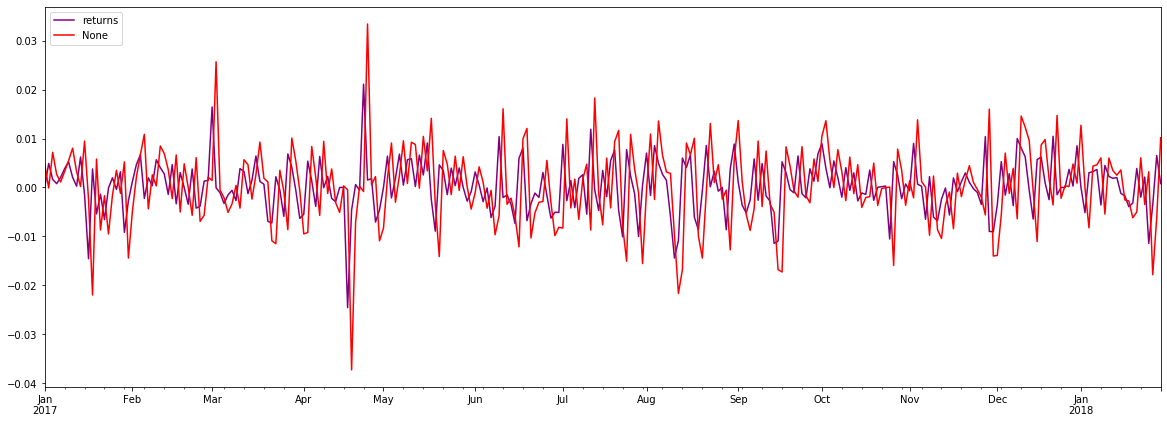

In [113]:
plt.figure(figsize=(20, 7))
df_test["returns"].loc["2017-01-02":].plot(color="purple")
predictions = result.predict(start="2017-01-02", end="2018-01-29", exog=df[["spx", "dax"]][1:])
predictions.plot(color="red")
plt.legend(loc="upper left")
plt.show()

## Forecasting Volatility

## ARCH

In [204]:
model = arch_model(df_ftse["returns"][1:] * 100, vol="Garch", dist="Normal", p=1, q=1)
result = model.fit(update_freq=10)
predictions = result.forecast(horizon=1)

Iteration:     10,   Func. Count:     73,   Neg. LLF: 8410.647245466369
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8410.646871498593
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12


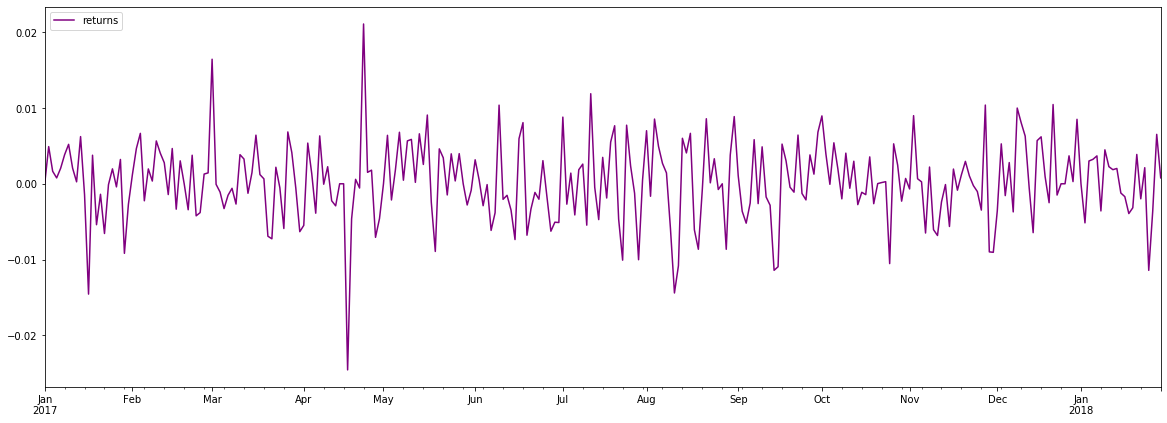

In [190]:
plt.figure(figsize=(20, 7))
df_test["returns"][1:].loc["2017-01-02":].plot(color="purple")
plt.plot(predictions.residual_variance.loc["2017-01-02":] / 100, color="red")
plt.legend(loc="upper left")
plt.show()